In [1]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 53.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 51.7 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data_train = pd.read_csv("subject/Train_knight.csv")
data_train.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,Sith
3,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,Sith
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,Sith


In [4]:
data_test = pd.read_csv("subject/Test_knight.csv")
data_test.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
2,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216
3,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.1288,0.2977,0.07259
4,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,...,18.07,19.08,125.10,980.9,0.1390,0.5954,0.6305,0.2393,0.4667,0.09946


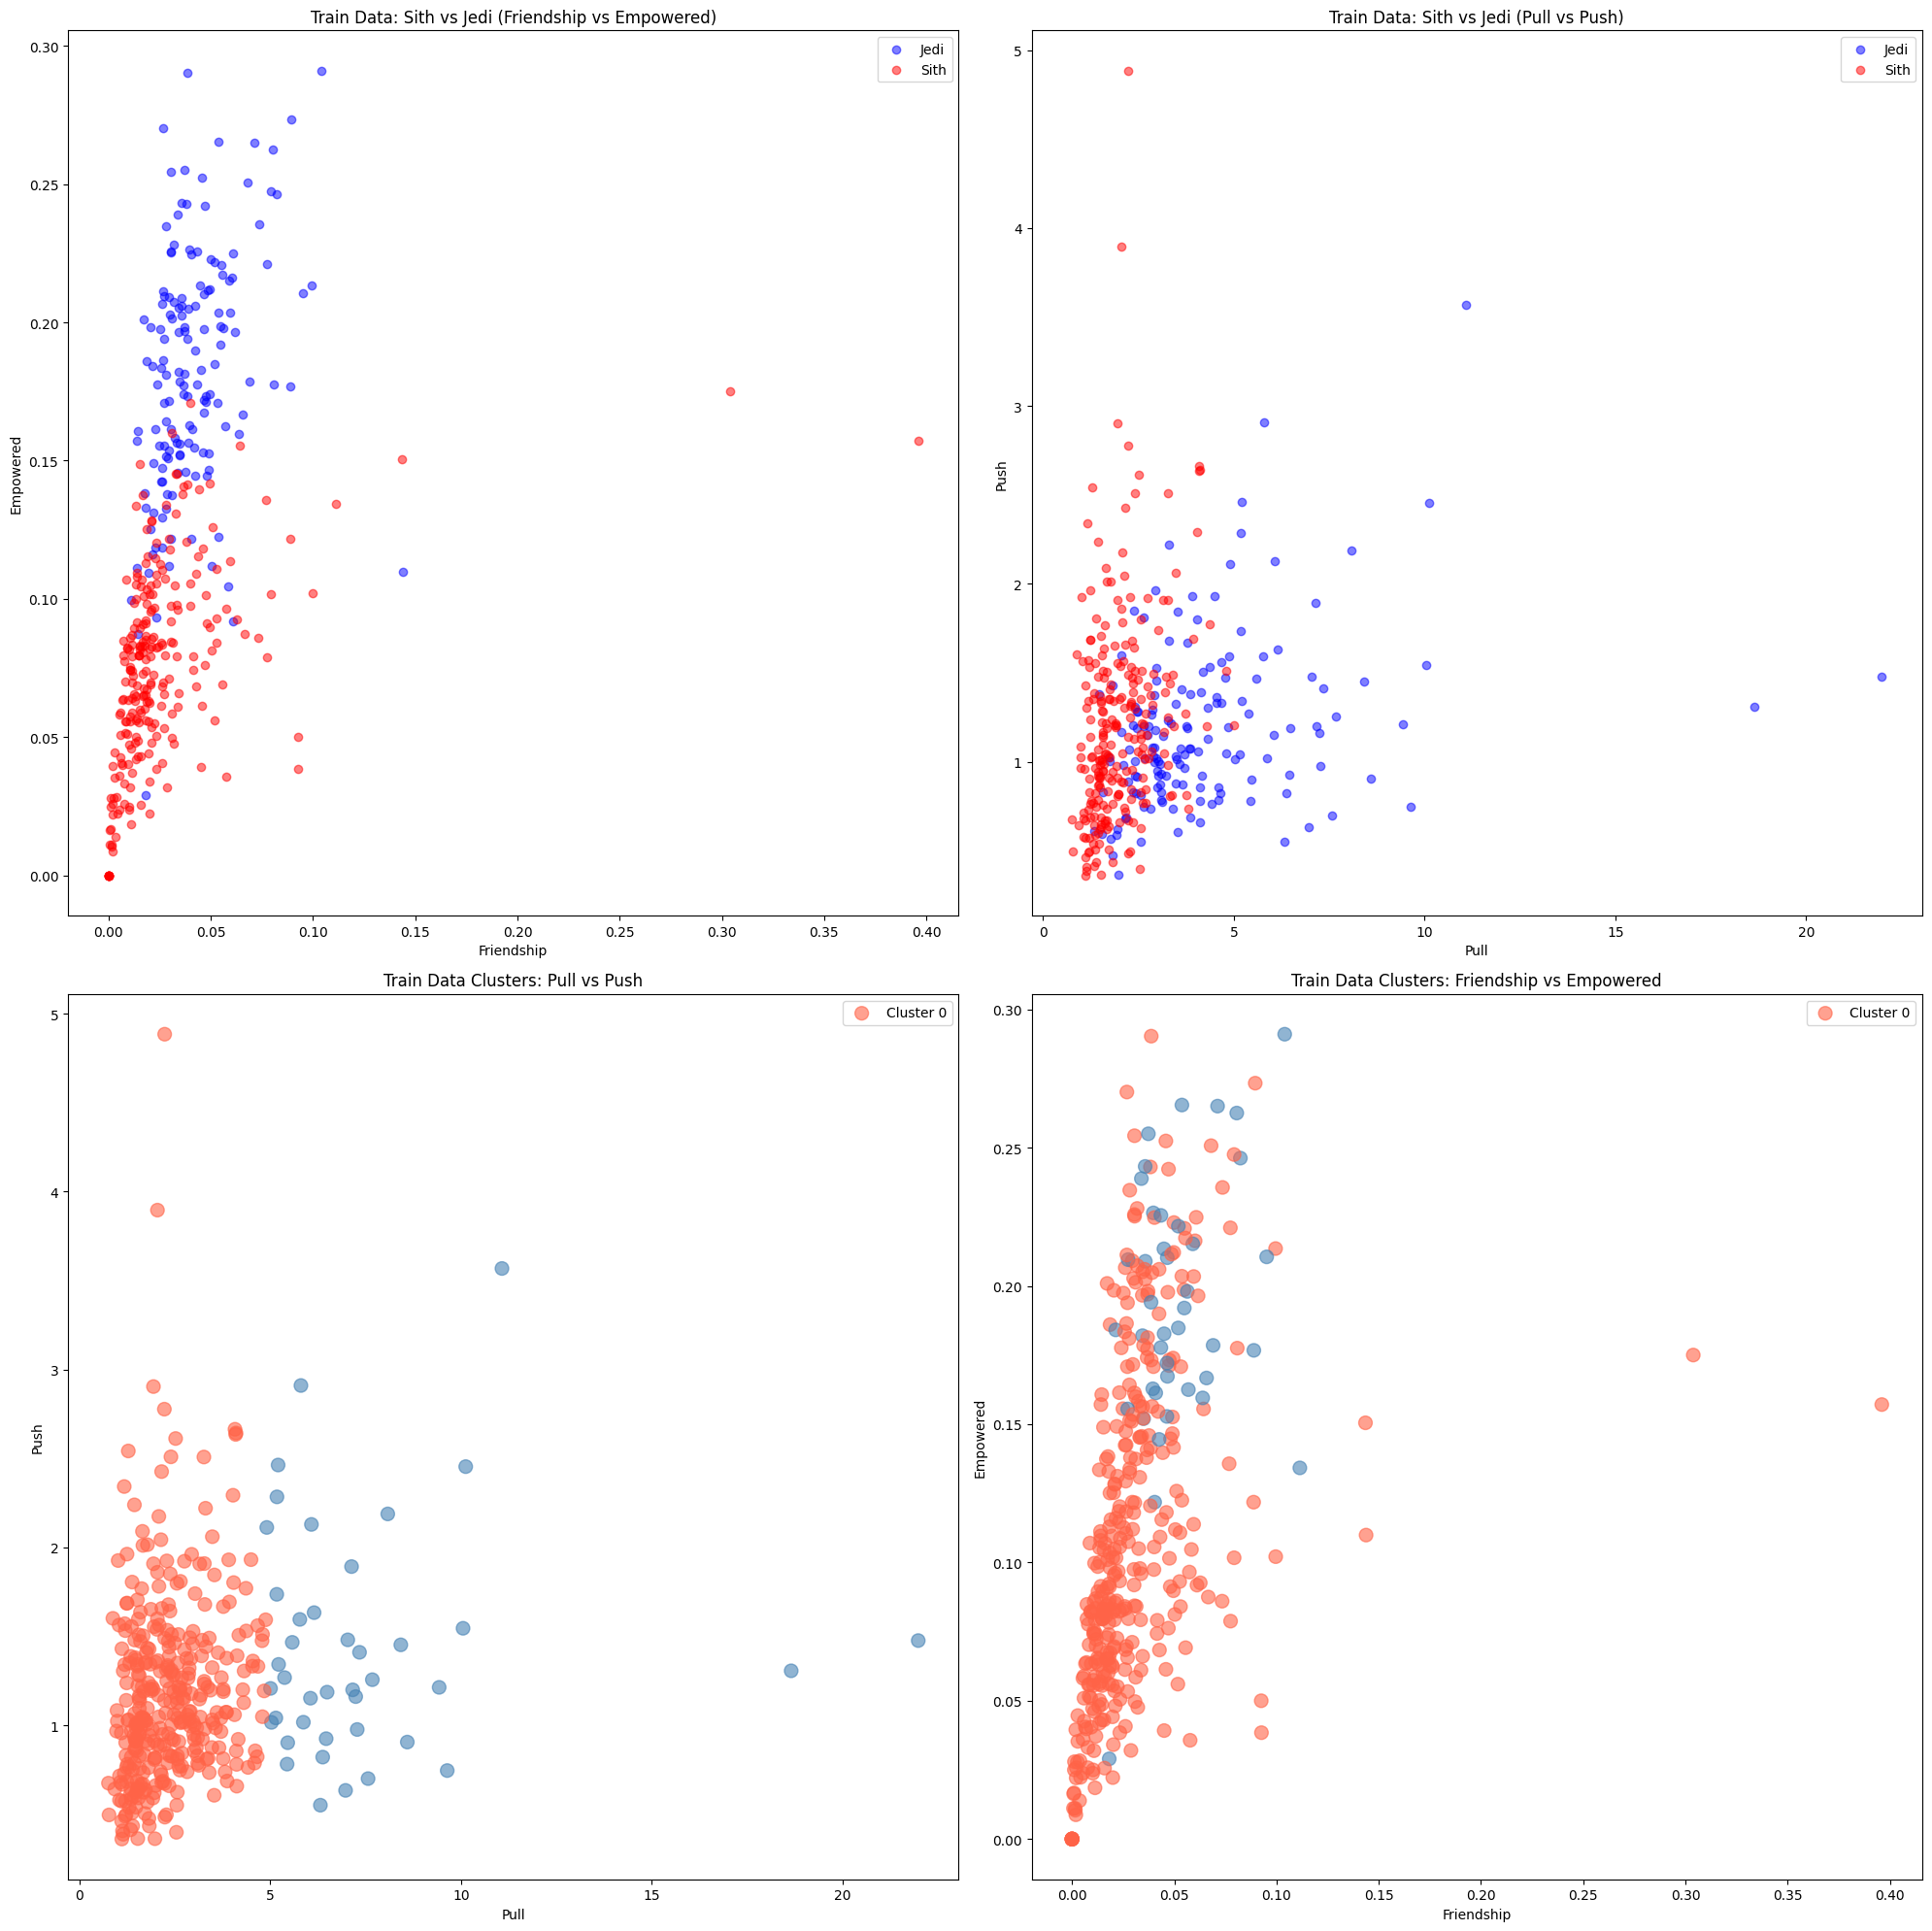

In [9]:
# Configurar los datos que se usarán para clustering en el conjunto de entrenamiento
features_train = data_train[['Pull', 'Push', 'Friendship', 'Empowered']]

# Aplicar KMeans para encontrar 2 clusters en los datos de entrenamiento (Sith y Jedi)
kmeans = KMeans(n_clusters=2, random_state=42)
data_train['cluster'] = kmeans.fit_predict(features_train)

# Asignar colores basados en los clusters para visualización
colors = ['#FF6347', '#4682B4']  # Color para cada cluster

# Crear la figura y subplots para visualización
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

# Gráfico 1: Separación original en los datos (Sith vs Jedi) para Friendship y Empowered
for knight, group in data_train.groupby('knight'):
    label_color = 'red' if knight == 'Sith' else 'blue'
    axes[0].scatter(group['Friendship'], group['Empowered'], label=knight, color=label_color, alpha=0.5)
axes[0].set_xlabel('Friendship')
axes[0].set_ylabel('Empowered')
axes[0].set_title('Train Data: Sith vs Jedi (Friendship vs Empowered)')
axes[0].legend()

# Gráfico 2: Separación original en los datos (Sith vs Jedi) para Pull y Push
for knight, group in data_train.groupby('knight'):
    label_color = 'red' if knight == 'Sith' else 'blue'
    axes[1].scatter(group['Pull'], group['Push'], label=knight, color=label_color, alpha=0.5)
axes[1].set_xlabel('Pull')
axes[1].set_ylabel('Push')
axes[1].set_title('Train Data: Sith vs Jedi (Pull vs Push)')
axes[1].legend()

# Gráfico 3: Clustering en datos de entrenamiento (Pull vs Push)
axes[2].scatter(data_train['Pull'], data_train['Push'], c=data_train['cluster'].map({0: colors[0], 1: colors[1]}), s=100, alpha=0.6)
axes[2].set_xlabel('Pull')
axes[2].set_ylabel('Push')
axes[2].set_title('Train Data Clusters: Pull vs Push')
axes[2].legend(['Cluster 0', 'Cluster 1'])

# Gráfico 4: Clustering en datos de entrenamiento (Friendship vs Empowered)
axes[3].scatter(data_train['Friendship'], data_train['Empowered'], c=data_train['cluster'].map({0: colors[0], 1: colors[1]}), s=100, alpha=0.6)
axes[3].set_xlabel('Friendship')
axes[3].set_ylabel('Empowered')
axes[3].set_title('Train Data Clusters: Friendship vs Empowered')
axes[3].legend(['Cluster 0', 'Cluster 1'])

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()